In [1]:
import numpy as np
import networkx as nx
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt
from time import time

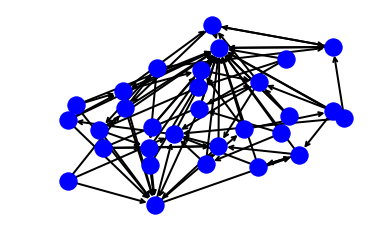

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import networkx as nx

G = nx.generators.directed.random_k_out_graph(30, 3, 0.5)
pos = nx.layout.spring_layout(G)

#node_sizes = [3 + 10 * i for i in range(len(G))]
#M = G.number_of_edges()
#edge_colors = range(2, M + 2)
#edge_alphas = [(5 + i) / (M + 4) for i in range(M)]

nodes = nx.draw_networkx_nodes(G, pos,  node_color='blue')
edges = nx.draw_networkx_edges(G, pos,  arrowstyle='->',
                               arrowsize=10, 
                               edge_cmap=plt.cm.Blues, width=2)
# set alpha value for each edge
#for i in range(M):
#    edges[i].set_alpha(edge_alphas[i])

#pc = mpl.collections.PatchCollection(edges, cmap=plt.cm.Blues)
#pc.set_array(edge_colors)
#plt.colorbar(pc)

ax = plt.gca()
ax.set_axis_off()
plt.show()

In [491]:
from scipy.sparse import csr_matrix, csc_matrix
#sizes = [int(10**i) for i in np.arange(1,4, 0.5)]
#sparsities = [ round(0.3**i, 5) for i in np.arange(1,4,0.5)]
sizes = [100*i for i in np.arange(1,9, 1)]
sparsities = [round(i, 5) for i in list(np.arange(0.01,0.1,0.02)) + list(np.arange(0.1,1.1,0.1))]
iterations = np.zeros((len(sizes), len(sparsities)))
damping = 0.15

begin = time()

for i, size in enumerate(sizes):
    for j, sparsity in enumerate(sparsities):
        A = np.ceil(sp.sparse.rand(size, size, sparsity).todense())
        #A = nx.to_numpy_matrix(nx.scale_free_graph(size))
        #A = nx.to_numpy_matrix(nx.gnr_graph(size, sparsity))
        #A = nx.to_numpy_array(G)

        D = np.divide(A,A.sum(axis=1),out=np.zeros_like(A), where=A!=0)
        # For dangling nodes add restart probabilities
        indicator = np.ones((size,1)) - D.sum(axis=1)
        S = (1/size) * (indicator @ np.ones((1,size)))
        D = D+S
        B = np.ones(shape=(size,size)) / size
        M = (1-damping)*D + damping*B
        M = csr_matrix(M)

        v_last = np.ones((1,size)) / np.ones((1,size)).sum()
        v_curr = np.ones((1,size)) / np.ones((1,size)).sum()
        diffs = []
        diff = 1
        epsilon = 0.001
        
        start = time()
        while diff > epsilon:
            v_last = v_curr
            v_curr = (v_last @ M)
            diff = np.sum(np.abs((v_curr - v_last)))
            diffs += [diff]
        end = time()
            
        iterations[i,j] = len(diffs)
        #iterations[i,j] = round(10000*(end - start), 3)
        #print(round(10000*(time() - start), 3))

        #print(f'Network is {size} by {size}, with sparsity = {sparsity}')
        #print(f'Stationary distribution converged (epsilon = {epsilon}) in {len(diffs)} iterations')

        #plt.scatter(range(len(diffs)),diffs)
        #plt.plot(range(len(diffs)),diffs)
        #plt.ylim(0)
iterations = iterations.round()

print(time()-begin)

6.241559028625488


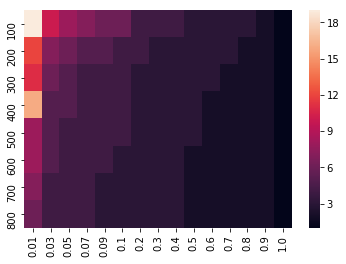

In [492]:
sns.heatmap(iterations, xticklabels= sparsities, yticklabels=sizes)

[(1, 0), (2, 0), (3, 0), (4, 1), (5, 0), (6, 0), (7, 0), (8, 0), (9, 0), (10, 2), (11, 2), (12, 6), (13, 2), (14, 9), (15, 9), (16, 9), (17, 0), (18, 0), (19, 0), (20, 0), (21, 10), (22, 9), (23, 8), (24, 11), (25, 1), (26, 0), (27, 23), (28, 0), (29, 0)]


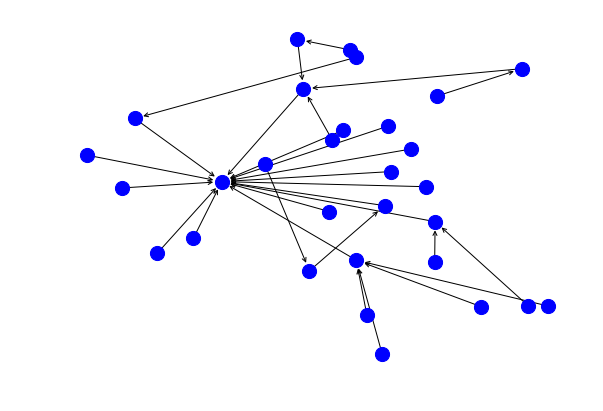

In [489]:
# networkX -> Numpy
G = nx.gnr_graph(30, 0.5)
print(G.edges)
plt.figure(figsize=(10,7))
pos = nx.layout.spring_layout(G, iterations=10)
nodes = nx.draw_networkx_nodes(G, pos,  node_color='blue', node_size=200)
edges = nx.draw_networkx_edges(G, pos,  arrowstyle='->',
                                arrowsize=10, 
                                edge_cmap=plt.cm.Blues, width=1)
ax = plt.gca()
ax.set_axis_off()

plt.show()

In [376]:
nx.to_numpy_matrix(G)

matrix([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.

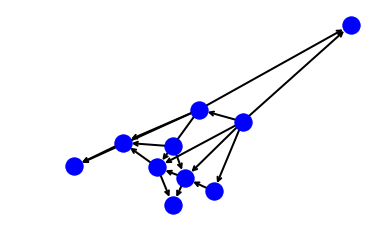

In [195]:
# Numpy -> networkX
size = 10
sparsity = 0.2
temp = np.ceil(sp.sparse.rand(size, size, sparsity).todense())
G = nx.DiGraph(temp)
pos = nx.layout.spring_layout(G)
nodes = nx.draw_networkx_nodes(G, pos,  node_color='blue')
edges = nx.draw_networkx_edges(G, pos,  arrowstyle='->',
                               arrowsize=10, 
                               edge_cmap=plt.cm.Blues, width=2)

ax = plt.gca()
ax.set_axis_off()
plt.show()

### Single iteration

Original Network:
[[0.    0.    0.    0.    1.   ]
 [0.    0.5   0.5   0.    0.   ]
 [1.    0.    0.    0.    0.   ]
 [0.333 0.    0.    0.333 0.333]
 [0.2   0.2   0.2   0.2   0.2  ]]


Google Network:
[[0.01  0.01  0.01  0.01  0.96 ]
 [0.01  0.485 0.485 0.01  0.01 ]
 [0.96  0.01  0.01  0.01  0.01 ]
 [0.327 0.01  0.01  0.327 0.327]
 [0.2   0.2   0.2   0.2   0.2  ]]


Network is 5 by 5, with sparsity = 0.5
Stationary distribution converged (epsilon = 0.001) in 8 iterations
Stationary distribution:
[[0.24948327 0.14515565 0.14515565 0.11151016 0.34869526]]


(0, 0.4407329140826181)

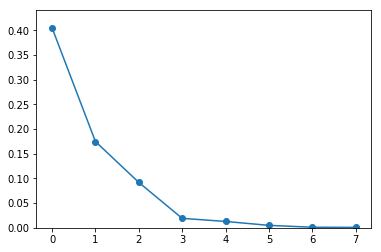

In [30]:
# TODO: print number of connected components
# TODO: print distribution of degrees

size = 5
sparsity = 0.5

A = np.ceil(sp.sparse.rand(size, size, sparsity).todense())
A = np.divide(A,A.sum(1),out=np.zeros_like(A), where=A!=0)
B = np.ones(shape=(size,size)) / size
M = (1-damping)*A + damping*B

v_last = np.ones((1,size)) / np.ones((1,size)).sum()
v_curr = np.ones((1,size)) / np.ones((1,size)).sum()
diffs = []
diff = 1
epsilon = 0.001
while diff > epsilon:
    v_curr = (v_last @ M)
    diff = np.sum(np.abs((v_curr - v_last)))
    diffs += [diff]
    v_last = v_curr

print('Original Network:')
print(A.round(3))
print('\n')

print('Google Network:')
print(M.round(3))
print('\n')
    
print(f'Network is {size} by {size}, with sparsity = {sparsity}')
print(f'Stationary distribution converged (epsilon = {epsilon}) in {len(diffs)} iterations')

print('Stationary distribution:')
print(v_last)

plt.scatter(range(len(diffs)),diffs)
plt.plot(range(len(diffs)),diffs)
plt.ylim(0)

## Running Example

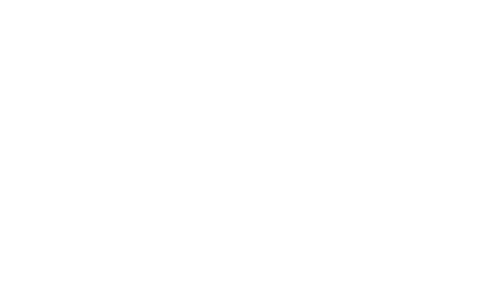

In [494]:
# networkX -> Numpy
G = nx.scale_free_graph(10)

pos = nx.layout.spring_layout(G, iterations=100)
plt.figure(figsize=(8,5))
# nodes = nx.draw_networkx_nodes(G, pos,  node_color='blue', node_sizes=[10000*prob for prob in v_last])
# edges = nx.draw_networkx_edges(G, pos,  arrowstyle='->',
#                                 arrowsize=10, 
#                                 edge_cmap=plt.cm.Blues, width=1)
#nx.draw(G, pos=pos, arrowstyle='->', node_size=80, arrowsize=10, width=1)
ax = plt.gca()
ax.set_axis_off()

plt.show()
#[10000*prob for prob in v_last]

# Current 

Original Network:


Google Network:


Network is 12 by 12, with sparsity = 0.15
Stationary distribution converged (epsilon = 0.001) in 11 iterations
Stationary distribution:
[0.49171945 0.16602578 0.15651586 0.01548627 0.04211569 0.03521935
 0.01548627 0.01548627 0.01548627 0.01548627 0.01548627 0.01548627]


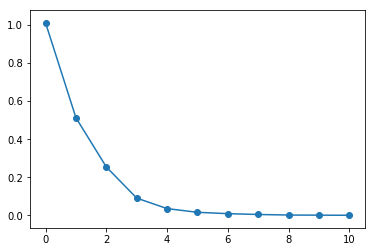

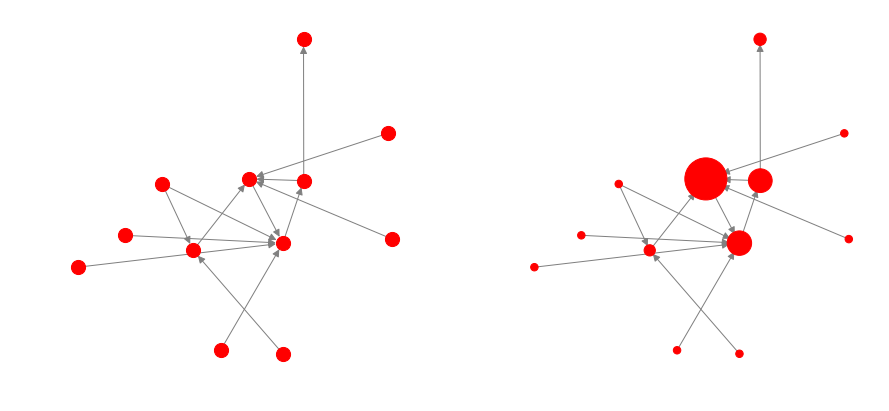

In [659]:
# TODO: print number of connected components
# TODO: print distribution of degrees

size = 12
sparsity = 0.15
damping = 0.15

#A = np.ceil(sp.sparse.rand(size, size, sparsity).todense())
alpha = 41
beta = 54
gamma = 5
alpha, beta, gamma = (val / (alpha + beta + gamma) for val in [alpha, beta, gamma])
A = nx.to_numpy_matrix(nx.scale_free_graph(size, alpha=alpha, beta=beta, gamma=gamma, 
                                           delta_in=0.2, delta_out=0), weight=1)
#A = nx.to_numpy_matrix(nx.gnr_graph(size, .1))

print('Original Network:')
#print(A.round(3))
print('\n')
D = np.divide(A,A.sum(axis=1),out=np.zeros_like(A), where=A!=0)
# For dangling nodes add restart probabilities
indicator = np.ones((size,1)) - D.sum(axis=1)
S = (1/size) * (indicator @ np.ones((1,size)))
D = D+S
B = np.ones(shape=(size,size)) / size
M = (1-damping)*D + damping*B

print('Google Network:')
#print(M.round(3))
print('\n')

v_last = np.ones((1,size)) / np.ones((1,size)).sum()
v_curr = np.ones((1,size)) / np.ones((1,size)).sum()
diffs = []
diff = 1
epsilon = 0.001
while diff > epsilon:
    v_curr = (v_last @ M)
    diff = np.sum(np.abs((v_curr - v_last)))
    diffs += [diff]
    v_last = v_curr
v_last = np.array(v_last)[0]
    
print(f'Network is {size} by {size}, with sparsity = {sparsity}')
print(f'Stationary distribution converged (epsilon = {epsilon}) in {len(diffs)} iterations')

print('Stationary distribution:')
print(v_last)

# Plotting

# Plot convergence
fig, ax = plt.subplots(1,1,figsize=(6,4))
ax.scatter(range(len(diffs)),diffs)
ax.plot(range(len(diffs)),diffs)
fig.savefig('convergence1.pdf')

# Plot Network
G = nx.DiGraph(A)
fig1, axes = plt.subplots(1,2,figsize=(15,7))
#pos = nx.layout.kamada_kawai_layout(G)
pos = nx.layout.spring_layout(G, iterations=10)
nx.draw_networkx_nodes(G, pos, node_color='Red', ax=axes[0], node_size=200)
nx.draw_networkx_nodes(G, pos, node_color='Red', ax=axes[1], node_size=((300/v_last.mean())*v_last))
nx.draw_networkx_edges(G, pos, edge_color='Gray', node_size=200,
                       arrowsize=15, width=1, ax=axes[0])
nx.draw_networkx_edges(G, pos, edge_color='Gray', node_size=((200/v_last.mean())*v_last),
                       arrowsize=15, width=1, ax=axes[1])
axes[0].set_axis_off()
axes[1].set_axis_off()
fig1.savefig('network1.pdf')
plt.show()

In [ ]:
'''Network is 12 by 12, with sparsity = 0.15
Stationary distribution converged (epsilon = 0.001) in 11 iterations
Stationary distribution:
[0.49171945 0.16602578 0.15651586 0.01548627 0.04211569 0.03521935
 0.01548627 0.01548627 0.01548627 0.01548627 0.01548627 0.01548627]'''

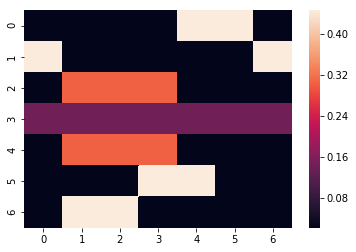

In [678]:
sns.heatmap(M)

In [679]:
np.array(A,dtype=int)

array([[0, 0, 0, 0, 1, 1, 0],
       [1, 0, 0, 0, 0, 0, 1],
       [0, 1, 1, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 1, 1, 1, 0, 0, 0],
       [0, 0, 0, 1, 1, 0, 0],
       [0, 1, 1, 0, 0, 0, 0]])

In [633]:
A

matrix([[0., 3., 3., 0., 0., 1., 0., 0., 0., 0., 0., 1.],
        [0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [3., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

Original Network:


Google Network:


Network is 40 by 40, with sparsity = 0.05
Stationary distribution converged (epsilon = 0.001) in 7 iterations
Stationary distribution:
[0.34180044 0.24043768 0.07536272 0.04062127 0.00561342 0.01038851
 0.01038851 0.00656844 0.01853216 0.00561342 0.01038851 0.00561342
 0.00561342 0.00561342 0.00561342 0.05402965 0.01516361 0.00561342
 0.00561342 0.00561342 0.00561342 0.00561342 0.00561342 0.00561342
 0.00640927 0.00561342 0.00561342 0.00800096 0.00800096 0.00561342
 0.00561342 0.00561342 0.00561342 0.00800096 0.00561342 0.01118436
 0.00561342 0.00561342 0.00561342 0.00561342]


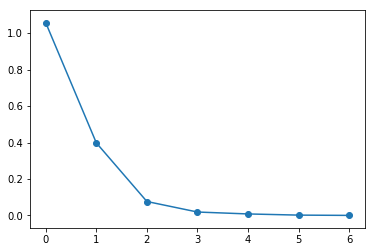

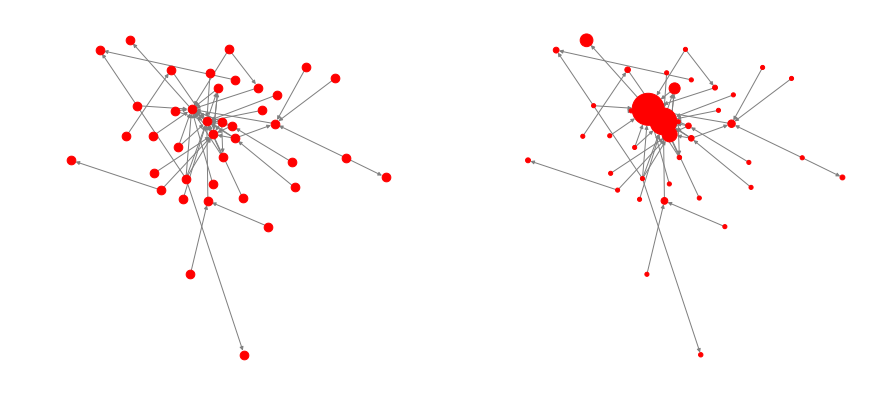

In [4]:
# TODO: print number of connected components
# TODO: print distribution of degrees

size = 40
node_size = 3000/size
arrow_size = 300/size
sparsity = 0.05
damping = 0.15

A = np.ceil(sp.sparse.rand(size, size, sparsity).todense())
alpha = 41
beta = 54
gamma = 5
alpha, beta, gamma = (val / (alpha + beta + gamma) for val in [alpha, beta, gamma])
A = nx.to_numpy_matrix(nx.scale_free_graph(size, alpha=alpha, beta=beta, gamma=gamma, 
                                           delta_in=0.2, delta_out=0.2, seed=1), weight=1)
#A = nx.to_numpy_matrix(nx.gnr_graph(size, .1))

print('Original Network:')
#print(np.array(A,dtype=int))
print('\n')
D = np.divide(A,A.sum(axis=1),out=np.zeros_like(A), where=A!=0)
# For dangling nodes add restart probabilities
indicator = np.ones((size,1)) - D.sum(axis=1)
S = (1/size) * (indicator @ np.ones((1,size)))
D = D+S
B = np.ones(shape=(size,size)) / size
M = (1-damping)*D + damping*B

print('Google Network:')
#print(M.round(2))
print('\n')

v_last = np.ones((1,size)) / np.ones((1,size)).sum()
v_curr = np.ones((1,size)) / np.ones((1,size)).sum()
diffs = []
diff = 1
epsilon = 0.001
while diff > epsilon:
    v_curr = (v_last @ M)
    diff = np.sum(np.abs((v_curr - v_last)))
    diffs += [diff]
    v_last = v_curr
v_last = np.array(v_last)[0]
    
print(f'Network is {size} by {size}, with sparsity = {sparsity}')
print(f'Stationary distribution converged (epsilon = {epsilon}) in {len(diffs)} iterations')

print('Stationary distribution:')
print(v_last)

# Plotting

# Plot convergence
fig, ax = plt.subplots(1,1,figsize=(6,4))
ax.scatter(range(len(diffs)),diffs)
ax.plot(range(len(diffs)),diffs)
#fig.savefig('convergence.pdf')

# Plot Network
G = nx.DiGraph(A)
fig1, axes = plt.subplots(1,2,figsize=(15,7))
#pos = nx.layout.kamada_kawai_layout(G)
pos = nx.layout.spring_layout(G, iterations=10)
nx.draw_networkx_nodes(G, pos, node_color='Red', ax=axes[0], node_size=node_size)
nx.draw_networkx_nodes(G, pos, node_color='Red', ax=axes[1], node_size=((node_size/v_last.mean())*v_last))
nx.draw_networkx_edges(G, pos, edge_color='Gray', node_size=node_size,
                       arrowsize=arrow_size, width=1, ax=axes[0])
nx.draw_networkx_edges(G, pos, edge_color='Gray', node_size=((node_size/v_last.mean())*v_last),
                       arrowsize=arrow_size, width=1, ax=axes[1])
axes[0].set_axis_off()
axes[1].set_axis_off()
fig1.savefig('test_network1.pdf')
plt.show()

In [ ]:
'''
Original Network:
[[0 0 0 0 1 1 0]
 [1 0 0 0 0 0 1]
 [0 1 1 1 0 0 0]
 [0 0 0 0 0 0 0]
 [0 1 1 1 0 0 0]
 [0 0 0 1 1 0 0]
 [0 1 1 0 0 0 0]]
 
Before damping:
[[0.   0.   0.   0.   0.5  0.5  0.  ]
 [0.5  0.   0.   0.   0.   0.   0.5 ]
 [0.   0.33 0.33 0.33 0.   0.   0.  ]
 [0.14 0.14 0.14 0.14 0.14 0.14 0.14]
 [0.   0.33 0.33 0.33 0.   0.   0.  ]
 [0.   0.   0.   0.5  0.5  0.   0.  ]
 [0.   0.5  0.5  0.   0.   0.   0.  ]]
 
Google Network:
[[0.02 0.02 0.02 0.02 0.45 0.45 0.02]
 [0.45 0.02 0.02 0.02 0.02 0.02 0.45]
 [0.02 0.3  0.3  0.3  0.02 0.02 0.02]
 [0.14 0.14 0.14 0.14 0.14 0.14 0.14]
 [0.02 0.3  0.3  0.3  0.02 0.02 0.02]
 [0.02 0.02 0.02 0.45 0.45 0.02 0.02]
 [0.02 0.45 0.45 0.02 0.02 0.02 0.02]]



Network is 7 by 7, with sparsity = 0.3
Stationary distribution converged (epsilon = 0.001) in 6 iterations
Stationary distribution:
[0.11966    0.18217433 0.18217433 0.17085514 0.13247456 0.09300164
 0.11966   ]
'''

In [677]:
print(D.round(2))

[[0.   0.   0.   0.   0.5  0.5  0.  ]
 [0.5  0.   0.   0.   0.   0.   0.5 ]
 [0.   0.33 0.33 0.33 0.   0.   0.  ]
 [0.14 0.14 0.14 0.14 0.14 0.14 0.14]
 [0.   0.33 0.33 0.33 0.   0.   0.  ]
 [0.   0.   0.   0.5  0.5  0.   0.  ]
 [0.   0.5  0.5  0.   0.   0.   0.  ]]


# geometric

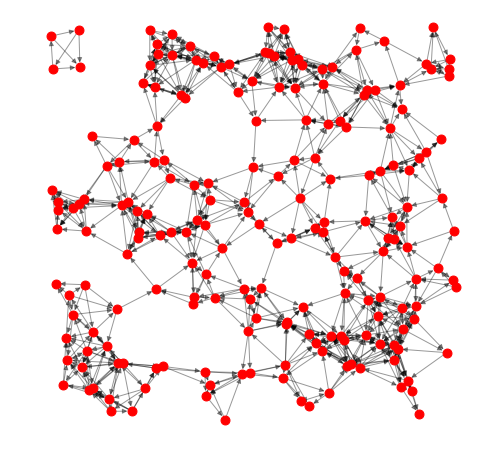

In [814]:
G = nx.random_geometric_graph(200, 0.125).to_directed()
#G = nx.random_geometric_graph(5, 0.7).to_directed()
new = []
mix = [(x,y) for x,y in np.random.permutation(G.edges)]
for edge in mix:
#for edge in G.edges:
    x, y = edge[0], edge[1]
    cond = (y,x) in new
    if not cond:
        new.append((x,y))
G.remove_edges_from(new)
# position is stored as node attribute data for random_geometric_graph
pos = nx.get_node_attributes(G, 'pos')

# find node near center (0.5,0.5)
dmin = 1
ncenter = 0
for n in pos:
    x, y = pos[n]
    d = (x - 0.5)**2 + (y - 0.5)**2
    if d < dmin:
        ncenter = n
        dmin = d

# color by path length from node near center
p = dict(nx.single_source_shortest_path_length(G, ncenter))

plt.figure(figsize=(8, 8))
nx.draw_networkx_edges(G, pos, 
                       #nodelist=[ncenter], 
                       node_size=80, alpha=0.4)
nx.draw_networkx_nodes(G, pos, 
                       #nodelist=list(p.keys()),
                       node_size=80,
                       #node_color=list(p.values()),
                       cmap=plt.cm.Reds_r)

plt.xlim(-0.05, 1.05)
plt.ylim(-0.05, 1.05)
plt.axis('off')
plt.show()

# auaioi

In [7]:
i=8

In [47]:
# TODO: print number of connected components
# TODO: print distribution of degrees
#i = i+1

np.random.seed(8)

size = 300
node_size = 10000/size
arrow_size = min(1500/size, 15)
sparsity = 1.5/np.sqrt(size)
damping = 0.05

G = nx.random_geometric_graph(size, sparsity, seed=8).to_directed()
#G = nx.random_geometric_graph(5, 0.7).to_directed()
new = []
mix = [(x,y) for x,y in np.random.permutation(G.edges)]
for edge in mix:
#for edge in G.edges:
    x, y = edge[0], edge[1]
    cond = (y,x) in new
    if not cond:
        new.append((x,y))
G.remove_edges_from(new)
pos = nx.get_node_attributes(G, 'pos')

Original Network:


Google Network:


Network is 300 by 300, with sparsity = 0.08660254037844385
Stationary distribution converged (epsilon = 0.001) in 47 iterations
Stationary distribution:


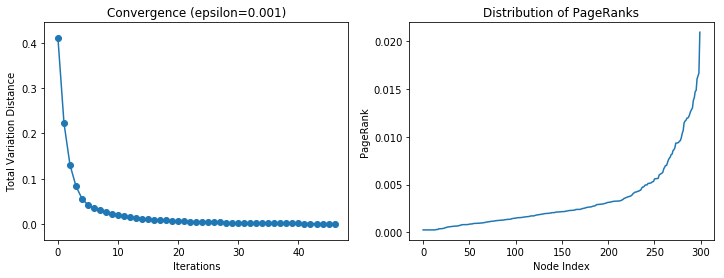

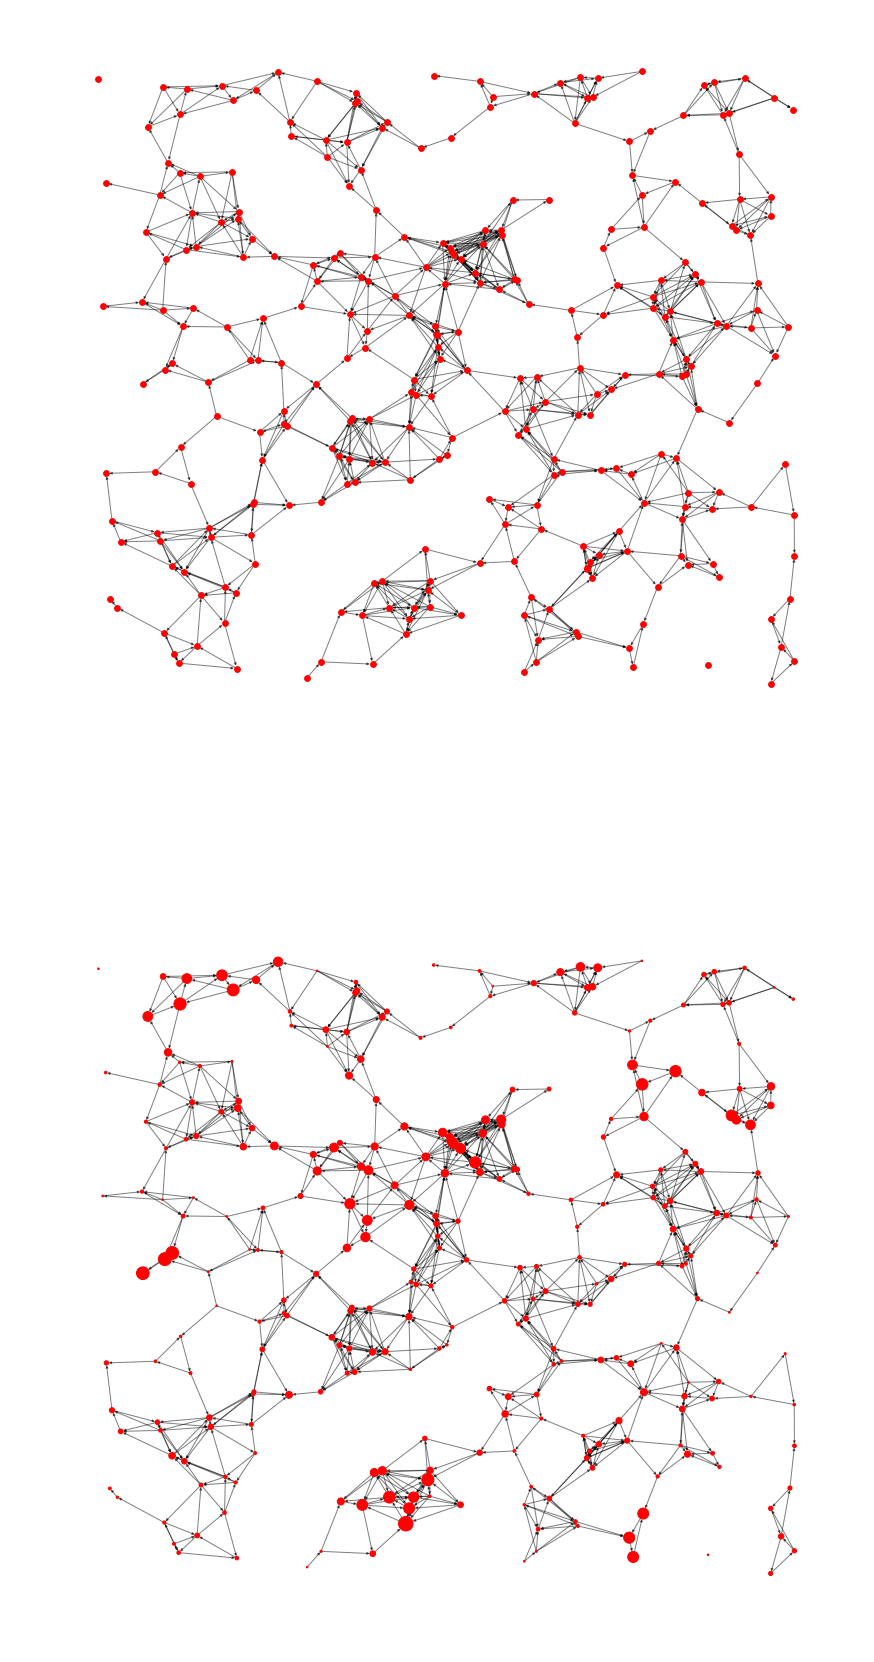

In [48]:
A = nx.to_numpy_matrix(G)

print('Original Network:')
#print(np.array(A,dtype=int))
print('\n')
D = np.divide(A,A.sum(axis=1),out=np.zeros_like(A), where=A!=0)
# For dangling nodes add restart probabilities
indicator = np.ones((size,1)) - D.sum(axis=1)
S = (1/size) * (indicator @ np.ones((1,size)))
D = D+S
B = np.ones(shape=(size,size)) / size
M = (1-damping)*D + damping*B

print('Google Network:')
#print(M.round(2))
print('\n')

v_last = np.ones((1,size)) / np.ones((1,size)).sum()
v_curr = np.ones((1,size)) / np.ones((1,size)).sum()
diffs = []
diff = 1
epsilon = 0.001
while diff > epsilon:
    v_curr = (v_last @ M)
    diff = np.sum(np.abs((v_curr - v_last)))
    diffs += [diff]
    v_last = v_curr
v_last = np.array(v_last)[0]
    
print(f'Network is {size} by {size}, with sparsity = {sparsity}')
print(f'Stationary distribution converged (epsilon = {epsilon}) in {len(diffs)} iterations')

print('Stationary distribution:')
#print(v_last)

# Plotting

# Plot convergence
fig, axs = plt.subplots(1,2,figsize=(12,4))
axs[0].scatter(range(len(diffs)),diffs)
axs[0].plot(range(len(diffs)),diffs)
axs[0].set(title=f'Convergence (epsilon={epsilon})', xlabel='Iterations', ylabel='Total Variation Distance')
axs[1].plot(np.sort(v_last))
axs[1].set(title='Distribution of PageRanks', xlabel='Node Index', ylabel='PageRank')
fig.savefig(f'convergence{i}.pdf')

# Plot Network
#G = nx.DiGraph(A)
fig1, axes = plt.subplots(2,1,figsize=(15,30))
#pos = nx.layout.kamada_kawai_layout(G)
#pos = nx.layout.spring_layout(G, iterations=10)
nx.draw_networkx_nodes(G, pos, node_color='Red', ax=axes[0], node_size=node_size)
nx.draw_networkx_nodes(G, pos, node_color='Red', ax=axes[1], node_size=((node_size/v_last.mean())*v_last),
                       #node_color=v_last,
                      #node_cmap=plt.cm.Reds
                      )
nx.draw_networkx_edges(G, pos, #edge_color='Gray', 
                       alpha=0.5,
                       node_size=node_size,
                       arrowsize=arrow_size, width=1, ax=axes[0])
nx.draw_networkx_edges(G, pos, 
                       #edge_color='Gray', 
                       alpha=0.5,
                       node_size=((node_size/v_last.mean())*v_last),
                       arrowsize=arrow_size, width=1, ax=axes[1])
axes[0].set_axis_off()
axes[1].set_axis_off()
fig1.savefig(f'test_network{i}.pdf')
plt.show()

### Animation

0
0.1


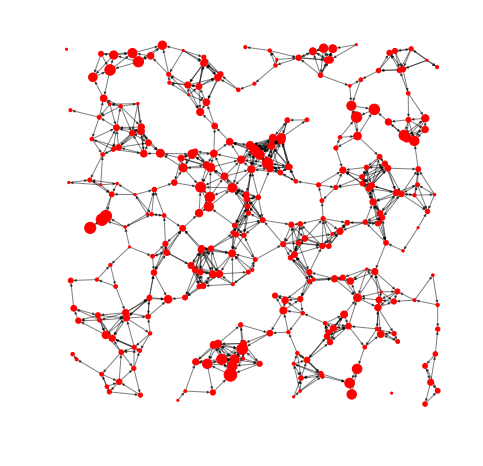

In [44]:
from matplotlib.animation import FuncAnimation
#i = i+1

np.random.seed(8)

size = 300
node_size = 10000/size
arrow_size = 1500/size
sparsity = 1.5/np.sqrt(size)
#damping = 0.15
damping_list = np.linspace(0.1, 1, 3)


G = nx.random_geometric_graph(size, sparsity, seed=8).to_directed()
#G = nx.random_geometric_graph(5, 0.7).to_directed()
new = []
mix = [(x,y) for x,y in np.random.permutation(G.edges)]
for edge in mix:
#for edge in G.edges:
    x, y = edge[0], edge[1]
    cond = (y,x) in new
    if not cond:
        new.append((x,y))
G.remove_edges_from(new)
pos = nx.get_node_attributes(G, 'pos')



A = nx.to_numpy_matrix(G)

D = np.divide(A,A.sum(axis=1),out=np.zeros_like(A), where=A!=0)
# For dangling nodes add restart probabilities
indicator = np.ones((size,1)) - D.sum(axis=1)
S = (1/size) * (indicator @ np.ones((1,size)))
D = D+S
B = np.ones(shape=(size,size)) / size

fig, ax = plt.subplots(1,1,figsize=(8,8))

def update(num):
    ax.clear()
    damping = damping_list[num]
    print(num)
    print(damping)

    M = (1-damping)*D + damping*B
    
    #print('Google Network:')
    #print(M.round(2))
    #print('\n')
    
    v_last = np.ones((1,size)) / np.ones((1,size)).sum()
    v_curr = np.ones((1,size)) / np.ones((1,size)).sum()
    diffs = []
    diff = 1
    epsilon = 0.001
    while diff > epsilon:
        v_curr = (v_last @ M)
        diff = np.sum(np.abs((v_curr - v_last)))
        diffs += [diff]
        v_last = v_curr
    v_last = np.array(v_last)[0]
    
    # Plot Network
    #G = nx.DiGraph(A)
    
    #pos = nx.layout.kamada_kawai_layout(G)
    #pos = nx.layout.spring_layout(G, iterations=10)
    #nx.draw_networkx_nodes(G, pos, node_color='Red', ax=axes[0], node_size=node_size)
    nx.draw_networkx_nodes(G, pos, node_color='Red', ax=ax, node_size=((node_size/v_last.mean())*v_last),
                           #node_color=v_last,
                          #node_cmap=plt.cm.Reds
                          )
    #nx.draw_networkx_edges(G, pos, #edge_color='Gray', 
    #                       alpha=0.5,
    #                       node_size=node_size,
    #                       arrowsize=arrow_size, width=1, ax=axes[0])
    nx.draw_networkx_edges(G, pos, 
                           #edge_color='Gray', 
                           alpha=0.5,
                           node_size=((node_size/v_last.mean())*v_last),
                           arrowsize=arrow_size, width=1, ax=ax)
    #axes[0].set_axis_off()
    ax.set_axis_off()
    #fig.savefig(f'test_network{i}.pdf')
    #plt.show()
    
    
anim = FuncAnimation(
    fig, update, 
    #interval=1, 
    frames=len(damping_list)
)
 
plt.draw()
plt.show()